<a href="https://colab.research.google.com/github/smraytech/test/blob/main/support_vector_machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines
You should build a machine learning pipeline using a support vector machine model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a support vector machine model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("/content/mnist.csv")

In [ ]:
print("Shape:", df.shape)
print(df.head())

Shape: (4000, 786)
      id  class  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0  31953      5       0       0       0       0       0       0       0   
1  34452      8       0       0       0       0       0       0       0   
2  60897      5       0       0       0       0       0       0       0   
3  36953      0       0       0       0       0       0       0       0   
4   1981      3       0       0       0       0       0       0       0   

   pixel8  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0      

In [ ]:
df.shape

(4000, 786)

In [ ]:
df.head()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dropping the id feature (not useful for prediction)

In [ ]:
df = df.drop(columns=["id"])

# Features & target

In [ ]:
X = df.drop("class", axis=1)
y = df["class"]

2. Split train/test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
print("Train:", X_train.shape, " Test:", X_test.shape)

Train: (3200, 784)  Test: (800, 784)


3. Preprocessing (scaling + optional PCA)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Optional PCA for faster training (set N_COMPONENTS=None to skip)

In [ ]:
N_COMPONENTS = 60
if N_COMPONENTS:
    pca = PCA(n_components=N_COMPONENTS, random_state=42)
    X_train_scaled = pca.fit_transform(X_train_scaled)
    X_test_scaled = pca.transform(X_test_scaled)
    print(f"PCA reduced to {N_COMPONENTS} components "
          f"(explained variance={pca.explained_variance_ratio_.sum():.3f})")

PCA reduced to 60 components (explained variance=0.680)


4. Train SVM

In [ ]:
svm = SVC(kernel="rbf", C=10, gamma="scale", random_state=42)
svm.fit(X_train_scaled, y_train)

SVC(C=10, random_state=42)

5. Evaluation

In [ ]:
y_pred = svm.predict(X_test_scaled)

In [ ]:
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.945

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       1.00      0.98      0.99        97
           2       0.84      1.00      0.91        78
           3       0.94      0.92      0.93        84
           4       0.94      0.92      0.93        74
           5       0.93      0.96      0.95        73
           6       0.95      0.96      0.96        78
           7       0.95      0.94      0.95        85
           8       0.96      0.88      0.92        83
           9       0.96      0.92      0.94        73

    accuracy                           0.94       800
   macro avg       0.95      0.94      0.94       800
weighted avg       0.95      0.94      0.95       800



Confusion matrix

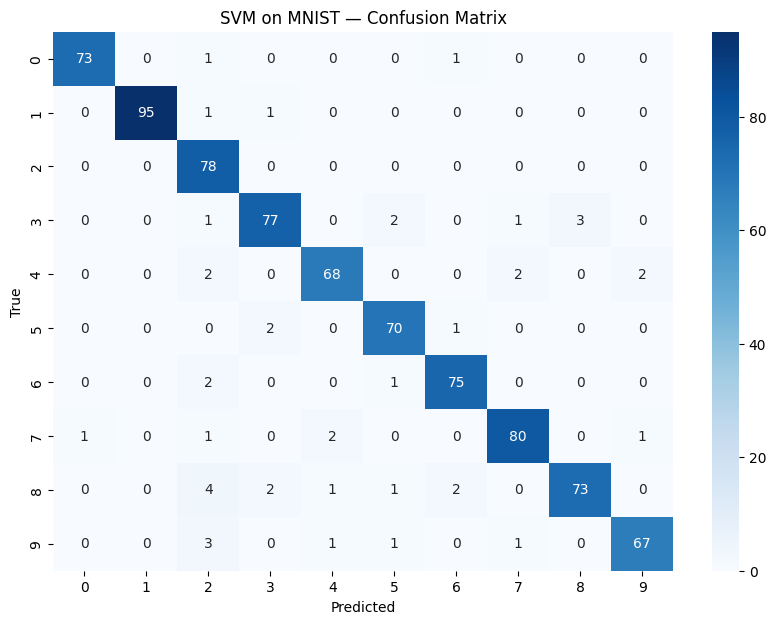

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("SVM on MNIST — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

4. GridSearchCV for best hyperparameters

In [ ]:
param_grid = {
    "C": [1, 10, 100],
    "gamma": ["scale", 0.01, 0.001],
    "kernel": ["rbf"]
}

print("\nStarting GridSearchCV...")
start_time = time.time()

grid = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    cv=3,
    verbose=2,
    n_jobs=-1
)
grid.fit(X_train_scaled, y_train)


Starting GridSearchCV...
Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(f"\nGridSearchCV finished in {(time.time() - start_time):.2f} seconds")
print("Best Parameters:", grid.best_params_)


GridSearchCV finished in 13.63 seconds
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


Confusion matrix

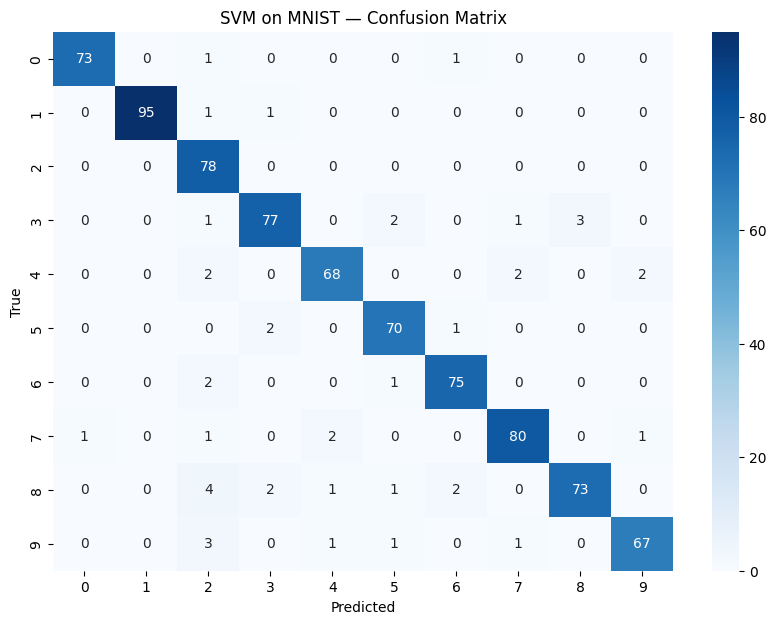

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("SVM on MNIST — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()